# feasibility map

This Jupyter notebook is a brief walkthrough covering core functionalities of the feasibility map. For a full up-to-date documentation, please refer to the [feasibility map GitHub repository](https://github.com/HUISUN24/feasibility_map.git)

### Install materials map

Installing materials map is simple and easy utilizing either **PyPI** package repository or cloning from **GitHub**.
While not required, it is recommended to first set up a virtual environment using venv or Conda. This ensures that
one of the required versions of Python (3.9) is used and there are no dependency conflicts. If you have Conda
installed on your system, you can create a new environment with:

    conda create -n materials_map python=3.9
    conda activate materials_map

And then simply install feasibility_map from PyPI with

    pip install materialsmap

Alternatively, you can also install materials map in editable mode if you cloned it from GitHub like

    git clone https://github.com/PhasesResearchLab/MaterialsMap

Or by downloading a ZIP file. Please note, this will by default download the latest development version of the
software, which may not be stable. For a stable version, you can specify a version tag after the URL with
`--branch <tag_name> --single-branch`.

Then, move to the materialsmap folder and install in editable (`-e`) mode

    cd materialsmap
    pip install -e .
    
### Install scheil
One of the dependency need fix by cloning from **GitHub**.

    git clone https://github.com/HUISUN24/scheil.git
    cd scheil
    pip install -e .

### then run pytest to test the functions

    pytest

### Starting with feasibility_map

Materials info

Input

In [83]:
# Create Compositions
comps = ['SS304L','NiCr','V']
database = './Ag-Al-Cu.TDB'
eleAmountType = 'massFraction'
pressure = 101325
ngridpts = 41  # number of points along each dimension of the composition grid
TemperatureRange = (900, 2300,10) #(lower limit, upper limit, temperature step)
indep_comps = [comps[1], comps[2]]  # choose them automatically
for i in comps:
    if i in periodic_table:
        materials[i] = {i:1}
    elif i not in materials.keys():
        materials['SS304L'] = {'Ni':0.09611451943, 'Cr':0.1993865031, 'Fe':0.7044989775}         # the composition of this element/alloys(in weight fractions)
maxNumSim = 250  # maximum number of simulations in each TCM file
# Equilibrium simulation settings

 # 'C-Cr-Cu-Fe-Mo-Nb-Ni-03-08.tdb' #'C-Cr-Cu-Fe-Mo-Nb-Ni-10-05.tdb'#'Cr-Fe-Ni-Ti-V_04-05.tdb' # <userDatabase>.TDB or TCFE8
eleAmountType = 'massFraction' # Candidates: massFraction moleFraction
output_Eq = f'{TemperatureRange[0]}-{TemperatureRange[1]}-{TemperatureRange[2]}-{comps[0]}-{comps[1]}-{comps[2]}-Eq'

In [84]:
from datetime import datetime
current_dateTime = datetime.now()
if '.tdb' in database or '.TDB' in database:
    database_name = database.split('/')
    path = f'./Simulation/{datetime.now().strftime("%m-%d-%Y")}-{comps[0]}-{comps[1]}-{comps[2]}-database-{database_name[-1][:-4]}'
else:
    path = f'./Simulation/{datetime.now().strftime("%m-%d-%Y")}-{comps[0]}-{comps[1]}-{comps[2]}-database-{database}'
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

The new directory is created!


In [85]:
compositions_list = generateCompositions(indep_comps,ngridpts)
Compositions, numPoint, comp, numSimultion = createComposition(indep_comps,comps,compositions_list,materials,path)
settings = [TemperatureRange,numPoint,numSimultion,comp,comps,indep_comps,os.path.abspath(database),pressure,eleAmountType]
print(settings)
np.save(f'{path}/setting.npy',settings)

Equilibrium simulation #: 903
Point #: 903
Element #: 4
relatedElement #: ['FE', 'NI', 'CR', 'V']
[(900, 2300, 10), 903, 903, ['FE', 'NI', 'CR', 'V'], ['SS304L', 'NiCr', 'V'], ['NiCr', 'V'], '/Users/sunhui/Desktop/new-charge/feasibility_map/tasks/Ag-Al-Cu.TDB', 101325, 'massFraction']


/Users/sunhui/opt/anaconda3/envs/feasibility1/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


MAPP

In [1]:
from materialsmap.core.ML import ML_run
from materialsmap.plot.ML_plot import ML_plot

In [2]:
path = '/Users/sunhui/Desktop/new-charge/feasibility_map/tasks/Simulation/07-12-2023-SS304L-NiCr-V-database-Ag-Al-Cu'

In [6]:
import os
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from materialsmap.core.compositions import generateCompositions,createComposition
from materialsmap.ref_data import periodic_table,materials
from materialsmap.core.pycalphad_run import pycalphad_eq,pycalphad_scheil
from materialsmap.core.GenerateEqScript import createEqScript
from materialsmap.core.ReadEqResult import getEqdata
from materialsmap.core.GenerateScheilScript import createScheilScript
from materialsmap.core.ReadScheilResult import getScheilSolidPhase
from materialsmap.plot.FeasibilityMap import plotMaps
from pycalphad import Database, equilibrium, Model, variables as v
from materialsmap.ref_data import eleweight
from pycalphad.core.calculate import _sample_phase_constitution
from pycalphad.core.errors import DofError
from pycalphad.core.utils import point_sample
from scheil import simulate_scheil_solidification
import json


In [9]:
from materialsmap.core.GenerateEqScript import getSettings,sortCompositions

In [17]:
a=getSettings(path)
a[8]
# output = sortCompositions(a[8])
# print(output[0])

{'FE': array([0.70449898, 0.68731608, 0.67013317, 0.65295027, 0.63576737,
        0.61858447, 0.60140157, 0.58421866, 0.56703576, 0.54985286,
        0.53266996, 0.51548706, 0.49830415, 0.48112125, 0.46393835,
        0.44675545, 0.42957255, 0.41238965, 0.39520674, 0.37802384,
        0.36084094, 0.34365804, 0.32647514, 0.30929223, 0.29210933,
        0.27492643, 0.25774353, 0.24056063, 0.22337772, 0.20619482,
        0.18901192, 0.17182902, 0.15464612, 0.13746322, 0.12028031,
        0.10309741, 0.08591451, 0.06873161, 0.05154871, 0.0343658 ,
        0.0171829 , 0.        , 0.68731608, 0.67013317, 0.65295027,
        0.63576737, 0.61858447, 0.60140157, 0.58421866, 0.56703576,
        0.54985286, 0.53266996, 0.51548706, 0.49830415, 0.48112125,
        0.46393835, 0.44675545, 0.42957255, 0.41238965, 0.39520674,
        0.37802384, 0.36084094, 0.34365804, 0.32647514, 0.30929223,
        0.29210933, 0.27492643, 0.25774353, 0.24056063, 0.22337772,
        0.20619482, 0.18901192, 0.17182902

In [7]:
path = '/Users/sunhui/Desktop/new-charge/feasibility_map/tasks/Simulation/06-24-2023-Ag-Al-Cu-database-Ag-Al-Cu'
pycalphad_eq(path)
pycalphad_scheil(path,2000)

{X_AL: 1e-05} (1/3)
{X_AL: 1e-05} (2/3)
{X_AG: 1e-05} (3/3)


100%|██████████| 3/3 [00:03<00:00,  1.33s/it]


{X_AL: 1e-05} (1/3)
{X_AL: 1e-05} (2/3)
{X_AG: 1e-05} (3/3)


100%|██████████| 3/3 [00:04<00:00,  1.47s/it]


The new directory for Eq is created!
The new directory for Scheil is created!
####################################################################
Plotting Scheil-Eq Feasibility Map
Plotting Ag-Al-Cu done!
####################################################################
Plotting Scheil-Eq Temperature Map
Plotting Scheil-Eq Temperature Map done!
####################################################################
Plotting Scheil Phase Heat Map
Plotting Scheil Phase Heat Map done!
##############################################################
2 samples do not have enough data point.
0 samples have no result.
##############################################################
##############################################################
Plotting Hot Tearing Susceptibility Map...
Plotting Hot Tearing Susceptibility Map...Done


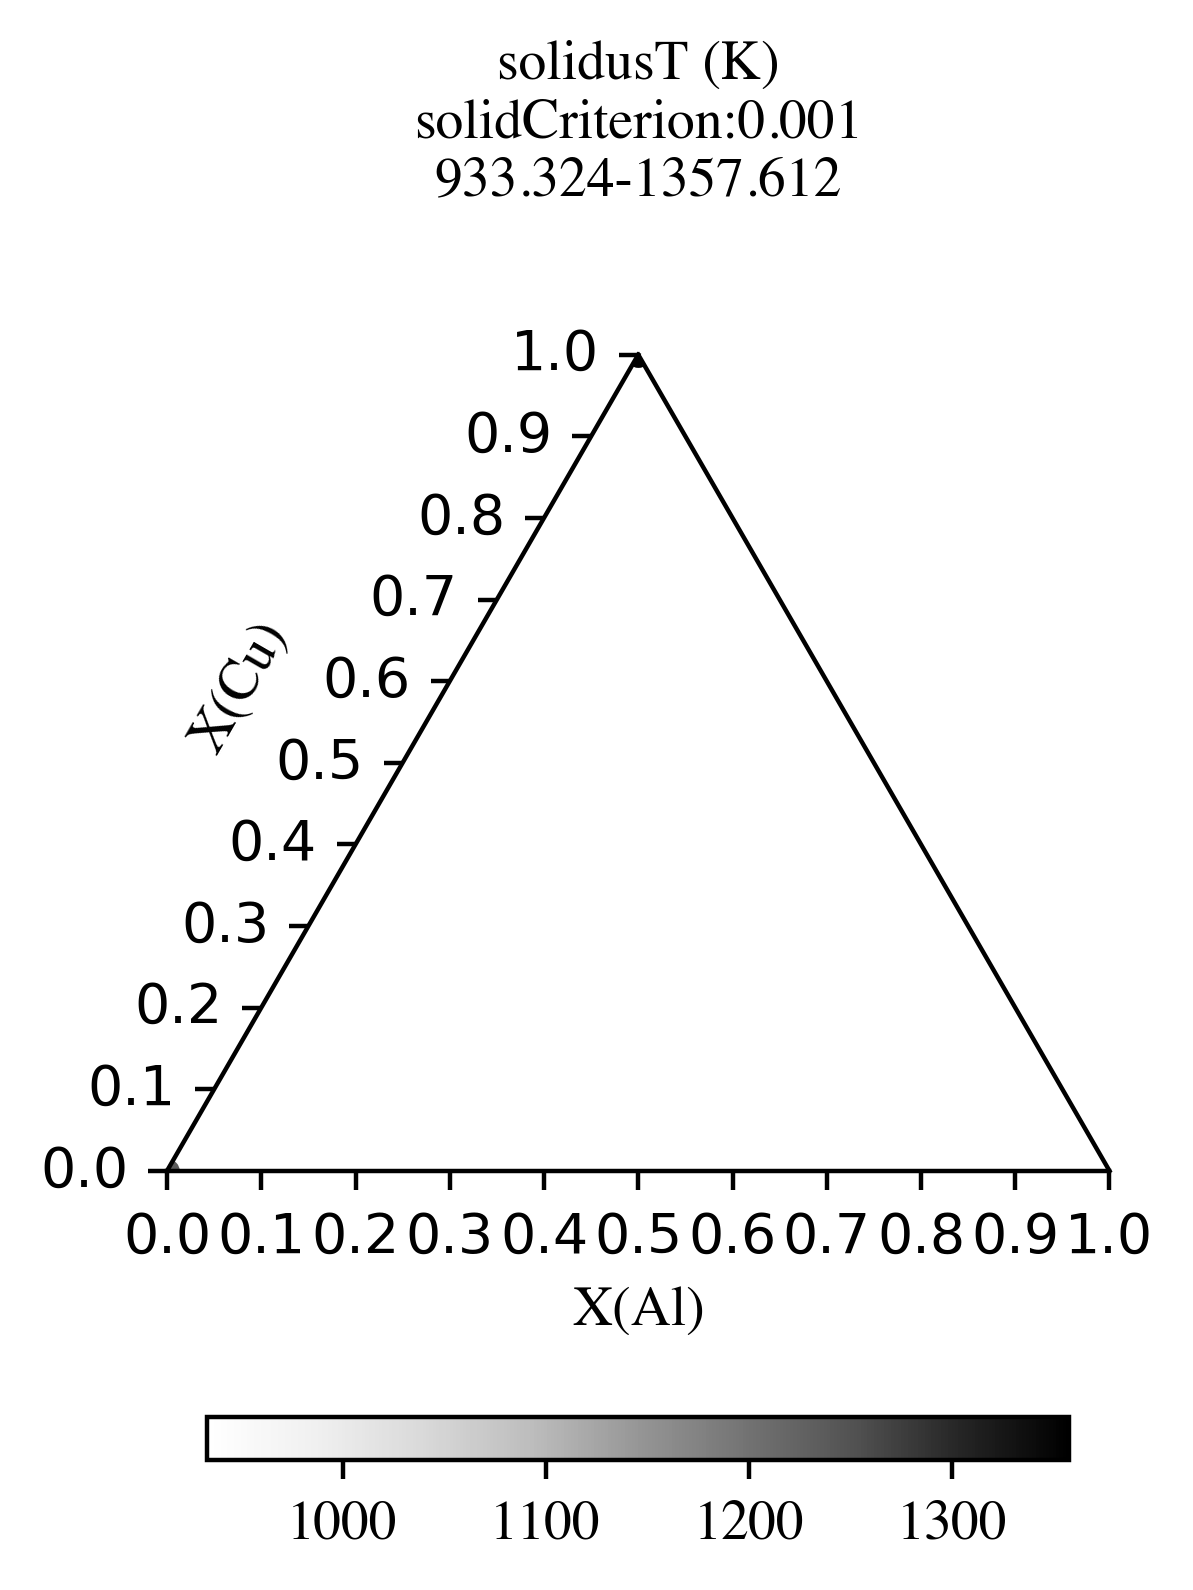

In [8]:
plotMaps(path,'pycalphad')

The new directory is created!


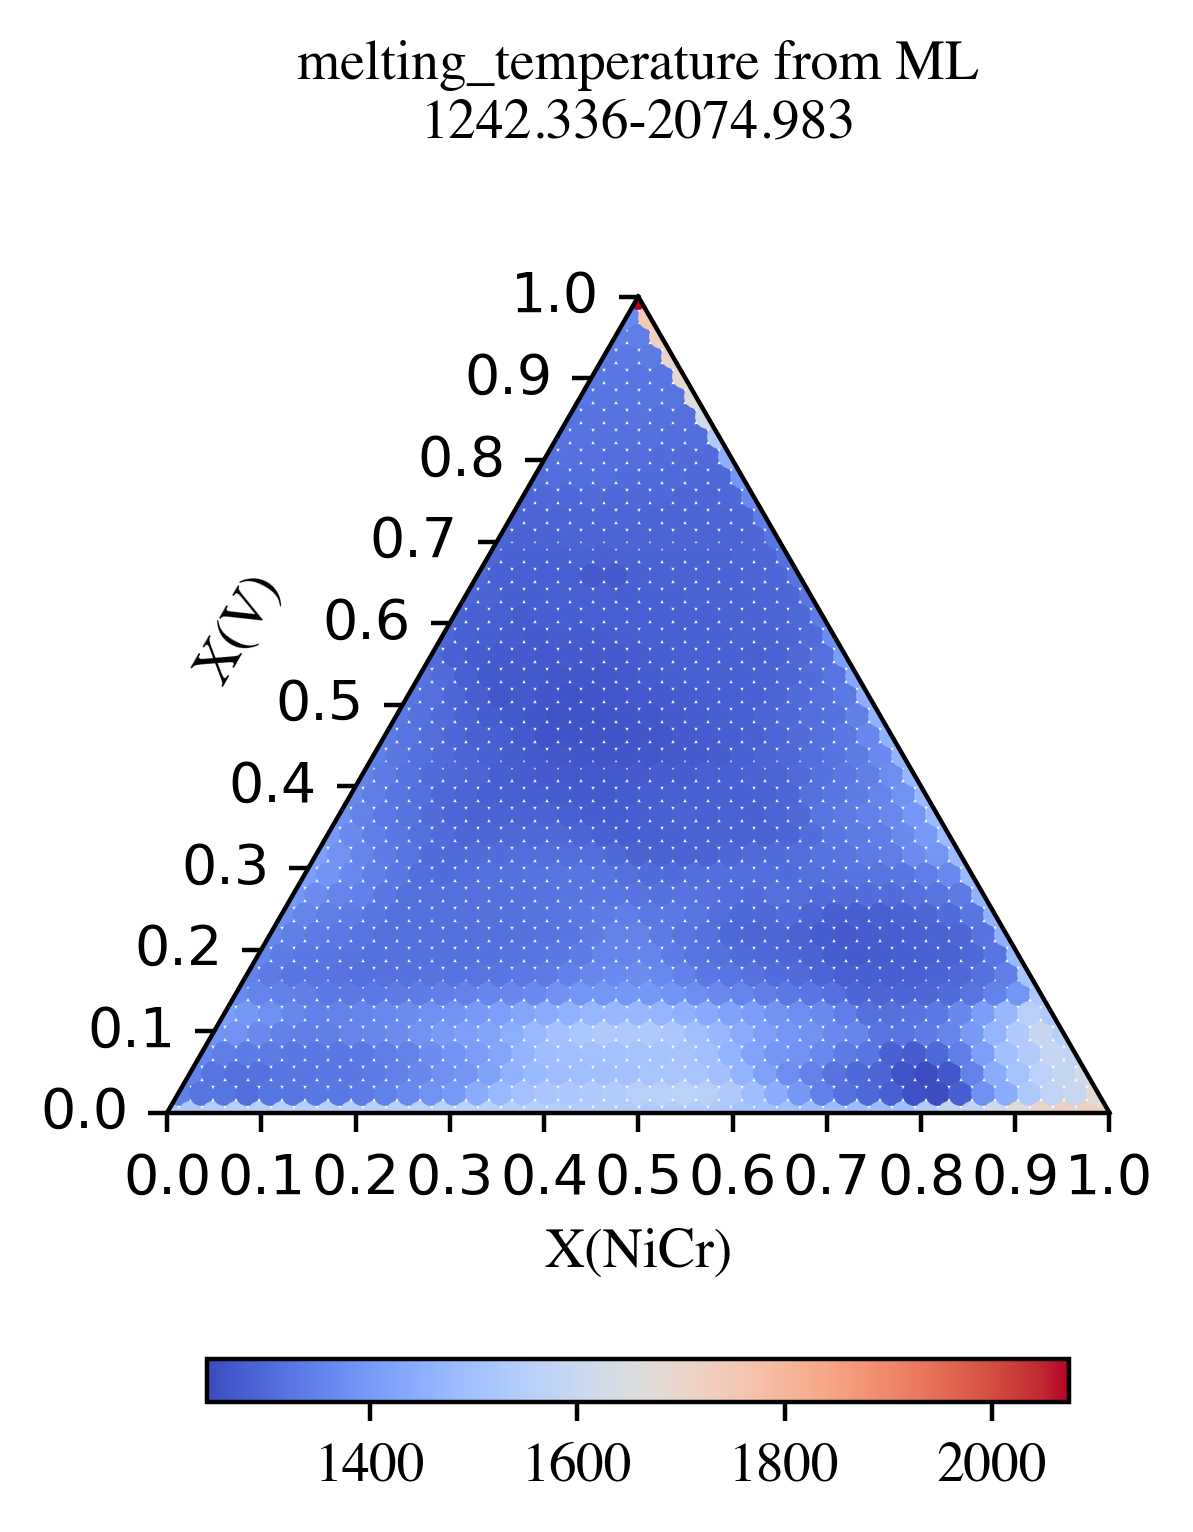

In [2]:
path = '/Users/sunhui/Desktop/new-charge/feasibility_map/tasks/Simulation/07-13-2023-SS304L-NiCr-V-database-Ag-Al-Cu'
#ML_run(path)
ML_plot(path)

In [4]:
import numpy as np
import pandas as pd
from pycalphad import Database, equilibrium, Model, variables as v
from materialsmap.ref_data import eleweight

In [1]:
path = '/Users/sunhui/Desktop/new-charge/feasibility_map/tasks/Simulation/07-12-2023-SS304L-NiCr-V-database-Ag-Al-Cu'

In [6]:
setting = np.load(f'{path}/setting.npy',allow_pickle=True)
comps = []
for i in setting[3]:
    comps.append(i.upper())
comps.append('VA')
compositions_list = []
indepcomp_list = []
all_comp_tot = []
df = pd.read_excel(f'{path}/composition_for_feasibilityMap.xlsx')
data_str = "["
for n in range(len(df.index)):
    comp_list={}
    all_comp = []
    nocomp_list = []
    indep = 0
    for o,i in enumerate(setting[3]):
        if indep == 0 and float(df.loc[n,[i]].values) > 0:
            indep  = 1
            indepcomp_list.append(i)
            all_comp.append(i)
            continue;
        elif float(df.loc[n,[i]].values) < 1E-5:
            nocomp_list.append(i)
            continue
        i = i.upper()
        all_comp.append(i)
        comp_list[v.W(i)]=float(df.loc[n,[i]].values)
    comp_list_mole = v.get_mole_fractions(comp_list,v.Species(indepcomp_list[n]),eleweight)
    if len(data_str) > 2: 
        data_str += ","
    if len(comp_list_mole) == 0:
        if len(all_comp[0]) > 1:
            comp_write = all_comp[0][0]+all_comp[0][1].lower()
        else:
            comp_write = all_comp[0]
        data_str += '{"9":"' + comp_write + '"}'
    else:
        print(all_comp)
        val_dep = 1
        data_str += '{"9":"'
        for co,val in comp_list_mole.items():
            val_dep = val_dep - val
            print(val_dep)
            cop = str(co)
            comp_write = cop.replace('X_','')
            if len(comp_write) > 1:
                comp_write = comp_write[0]+comp_write[1].lower()
            else:
                comp_write = comp_write        
            data_str += comp_write + str(val)
        if len(all_comp[0]) > 1:
            comp_write_dep = all_comp[0][0]+all_comp[0][1].lower()
        else:
            comp_write_dep = all_comp[0]        
        data_str += comp_write_dep + str(val_dep)
        data_str += '"}'   

    # if len(comp_list_mole) == 0:
    #     comp_list_mole[v.X(nocomp_list[0])]=1E-5
    #     all_comp.append(nocomp_list[0])
    # all_comp_tot.append(all_comp)
    # compositions_list.append(comp_list_mole)
data_str += "]"

['FE', 'CR', 'NI']
0.7879942808632425
0.6974576256949904
['CR', 'NI', 'V']
0.5307536792455425
0.47800794678836955
['FE', 'CR', 'NI', 'V']
0.8047255485732137
0.7213339507239493
0.6424150056214434


In [7]:
print(data_str)

[{"9":"Cr0.21200571913675742Ni0.09053665516825214Fe0.6974576256949904"},{"9":"Fe"},{"9":"Ni0.46924632075445744V0.052745732457172956Cr0.47800794678836955"},{"9":"Cr0.19527445142678632Ni0.08339159784926434V0.078918945102506Fe0.6424150056214434"}]


In [8]:
import requests

url = 'http://206.207.50.58:5007/MT_ML_Qijun_Hong_Predict_noNN'
payload = data_str
headers = {'content-type': 'application/json'}
r = requests.post(url, data=payload, headers=headers)

In [ ]:
df_mp = pd.DataFrame(str(r.content).split('{"melting temperature\": ')[1:], columns=['mp'])
df_mp['melting_temperature_in_kelvin'] = df_mp.apply(lambda x: float( x['mp'].split(",")[0] ), axis=1)
df_mp['standard_error_in_kelvin'] = df_mp.apply(lambda x: float( x['mp'].split(":")[1].split("}")[0] ), axis=1)



In [156]:
df_mp['melting_temperature_in_kelvin'][0]

1525.21630859375

In [160]:
from collections import defaultdict
import json
data_ML = defaultdict(dict)
for i in df_mp.index:
    data_ML['Point'+str(i)]['TK'] = df_mp['melting_temperature_in_kelvin'][i]
    data_ML['Point'+str(i)]['STD'] = df_mp['standard_error_in_kelvin'][i]

In [161]:
isExist = os.path.exists(path+'/ML/Melting_temperature/Result/')
if not isExist:
    os.makedirs(path+'/ML/Melting_temperature/Result/')
    print("The new directory is created!")
output_File = json.dumps(data_ML)
f = open(path+'/ML/Melting_temperature/Result/data_ML.json','w')
f.write(output_File)
f.close()

In [143]:
df_mp

mp  \
0  1525.21630859375, "standard error": 92.5711975...   
1  1783.68310546875, "standard error": 19.8182086...   
2  1536.16015625, "standard error": 25.4218769073...   
3  1356.5272216796875, "standard error": 125.8892...   

   melting_temperature_in_kelvin  standard_error_in_kelvin  
0                    1525.216309                 92.571198  
1                    1783.683105                 19.818209  
2                    1536.160156                 25.421877  
3                    1356.527222                125.889297

In [6]:
setting = np.load(f'{path}/setting.npy',allow_pickle=True)
dbf = Database(setting[6])
comps = []
for i in setting[3]:
    comps.append(i.upper())
comps.append('VA')
phases = list(dbf.phases.keys())
potentials = {v.N: 1, v.T: setting[0], v.P: setting[7]}  # for equilibrium calculations
compositions_list = []
indepcomp_list = []
all_comp_tot = []
df = pd.read_excel(f'{path}/composition_for_feasibilityMap.xlsx')
for n in range(len(df.index)):
    comp_list={}
    all_comp = []
    nocomp_list = []
    indep = 0
    for o,i in enumerate(setting[3]):
        if indep == 0 and float(df.loc[n,[i]].values) > 0:
            indep  = 1
            indepcomp_list.append(i)
            all_comp.append(i)
            continue;
        elif float(df.loc[n,[i]].values) < 1E-5:
            nocomp_list.append(i)
            continue
        i = i.upper()
        all_comp.append(i)
        comp_list[v.W(i)]=float(df.loc[n,[i]].values)
    comp_list_mole = v.get_mole_fractions(comp_list,v.Species(indepcomp_list[n]),eleweight)
    if len(comp_list_mole) == 0:
        comp_list_mole[v.X(nocomp_list[0])]=1E-5
    all_comp.append(nocomp_list[0])
    all_comp_tot.append(all_comp)
    compositions_list.append(comp_list_mole)

iter_args_equilibrium = []
for num, composition in enumerate(compositions_list):
    print(f"{composition} ({num+1}/{len(compositions_list)})")
    # Equilibrium calculation for feasibility
    
    for key,val in composition.items():
        composition[key] = float("{:.6f}".format(val))    
    conds = {**composition}
    conds.update(potentials)
    comps_new = all_comp_tot[num]
    comps_new.append('VA')
    print(comps_new, phases, conds)
    iter_args_equilibrium.append((dbf, comps_new, phases, conds))

{X_AL: 1e-05} (1/3)
['AG', 'AL', 'VA'] ['GAS', 'LIQUID', 'BCC_A2', 'CUB_A13', 'DELTA', 'EPSILON', 'ETA', 'FCC_A1', 'GAMMA_D83', 'GAMMA_H', 'HCP_A3', 'THETA', 'ZETA'] {X_AL: 1e-05, N: 1, T: (600, 2000, 40), P: 101325}
{X_AL: 1e-05} (2/3)
['CU', 'AL', 'VA'] ['GAS', 'LIQUID', 'BCC_A2', 'CUB_A13', 'DELTA', 'EPSILON', 'ETA', 'FCC_A1', 'GAMMA_D83', 'GAMMA_H', 'HCP_A3', 'THETA', 'ZETA'] {X_AL: 1e-05, N: 1, T: (600, 2000, 40), P: 101325}
{X_AG: 1e-05} (3/3)
['AL', 'AG', 'VA'] ['GAS', 'LIQUID', 'BCC_A2', 'CUB_A13', 'DELTA', 'EPSILON', 'ETA', 'FCC_A1', 'GAMMA_D83', 'GAMMA_H', 'HCP_A3', 'THETA', 'ZETA'] {X_AG: 1e-05, N: 1, T: (600, 2000, 40), P: 101325}


In [1]:
import os
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from materialsmap.core.compositions import generateCompositions,createComposition
from materialsmap.ref_data import periodic_table,materials
from materialsmap.core.pycalphad_run import pycalphad_eq,pycalphad_scheil
from materialsmap.core.GenerateEqScript import createEqScript
from materialsmap.core.ReadEqResult import getEqdata
from materialsmap.core.GenerateScheilScript import createScheilScript
from materialsmap.core.ReadScheilResult import getScheilSolidPhase
from materialsmap.plot.FeasibilityMap import plotMaps
from pycalphad import Database, equilibrium, Model, variables as v
from materialsmap.ref_data import eleweight
from pycalphad.core.calculate import _sample_phase_constitution
from pycalphad.core.errors import DofError
from pycalphad.core.utils import point_sample
from scheil import simulate_scheil_solidification
import json

In [2]:
path = '/Users/sunhui/Desktop/new-charge/feasibility_map/tasks/Simulation/06-24-2023-Ag-Al-Cu-database-Ag-Al-Cu'
setting = np.load(f'{path}/setting.npy',allow_pickle=True)

In [24]:
setting = np.load(f'{path}/setting.npy',allow_pickle=True)
dbf = Database(setting[6])
comps = []
for i in setting[3]:
    comps.append(i.upper())
comps.append('VA')
phases = list(dbf.phases.keys())
compositions_list = []
indepcomp_list = []
all_comp_tot = []
df = pd.read_excel(f'{path}/composition_for_feasibilityMap.xlsx')
for n in range(len(df.index)):
    comp_list={}
    all_comp = []
    nocomp_list = []
    indep = 0
    for o,i in enumerate(setting[3]):
        if indep == 0 and float(df.loc[n,[i]].values) > 0:
            indep  = 1
            indepcomp_list.append(i)
            all_comp.append(i)
            continue;
        elif float(df.loc[n,[i]].values) < 1E-5:
            nocomp_list.append(i)
            continue
        i = i.upper()
        all_comp.append(i)
        comp_list[v.W(i)]=float(df.loc[n,[i]].values)
    comp_list_mole = v.get_mole_fractions(comp_list,v.Species(indepcomp_list[n]),eleweight)
    if len(comp_list_mole) == 0:
        comp_list_mole[v.X(nocomp_list[0])]=1E-5
    all_comp.append(nocomp_list[0])
    all_comp_tot.append(all_comp)
    compositions_list.append(comp_list_mole)
LiquidusTemp = []
isExist = os.path.exists(path+'/Pycalphad/Equilibrium Simulation/Result/')
if isExist:
    f = open(path+'/Pycalphad/Equilibrium Simulation'+'/Result/data_mole.json')
    eq_results = json.load(f)
    for j in eq_results.values():
        if len(j.keys()) == 1:
            j = None
            LiquidusTemp.append(intial_temperature)
            break;
        for n,a in enumerate(j['LIQUID']):
            if n+1 == len(j['LIQUID']):
                print('cannot find liquid phase in eq results, start with back up temperature')
                LiquidusTemp.append(intial_temperature)
            elif float(a) < 1 and float(j['LIQUID'][n+1]) == 1:
                LiquidusTemp.append(j['TK'][n+1])
                break;
if len(LiquidusTemp) == 0:
    T_liquid = [intial_temperature]*len(compositions_list)
else:
    T_liquid = LiquidusTemp
# Generate points for adaptive Scheil starting points (performance)
points_dict = {}
for phase_name in phases:
    try:
        mod = Model(dbf, comps, phase_name)
        points_dict[phase_name] = _sample_phase_constitution(mod, point_sample, True, 500)
    except DofError:
        pass
liquid_name = 'LIQUID'
step_temperature = 1.0
eq_kwargs = {'calc_opts': {'points': points_dict}}
stop = 0.0001
verbose = False
adaptive = True
# Run simulations
iter_args_scheil = []
for num, composition in enumerate(compositions_list):
    print(f"{composition} ({num+1}/{len(compositions_list)})")
    for key,val in composition.items():
        composition[key] = float("{:.6f}".format(val))  
    comps_new = all_comp_tot[num]
    comps_new.append('VA')  
    print('in',comps_new, phases, composition, T_liquid[num], step_temperature,liquid_name)
    iter_args_scheil.append((dbf, comps_new, phases, composition, T_liquid[num], step_temperature,liquid_name,verbose, adaptive))

{X_AL: 1e-05} (1/3)
in ['AG', 'AL', 'VA'] ['GAS', 'LIQUID', 'BCC_A2', 'CUB_A13', 'DELTA', 'EPSILON', 'ETA', 'FCC_A1', 'GAMMA_D83', 'GAMMA_H', 'HCP_A3', 'THETA', 'ZETA'] {X_AL: 1e-05} 1240.0 1.0 LIQUID
{X_AL: 1e-05} (2/3)
in ['CU', 'AL', 'VA'] ['GAS', 'LIQUID', 'BCC_A2', 'CUB_A13', 'DELTA', 'EPSILON', 'ETA', 'FCC_A1', 'GAMMA_D83', 'GAMMA_H', 'HCP_A3', 'THETA', 'ZETA'] {X_AL: 1e-05} 1360.0 1.0 LIQUID
{X_AG: 1e-05} (3/3)
in ['AL', 'AG', 'VA'] ['GAS', 'LIQUID', 'BCC_A2', 'CUB_A13', 'DELTA', 'EPSILON', 'ETA', 'FCC_A1', 'GAMMA_D83', 'GAMMA_H', 'HCP_A3', 'THETA', 'ZETA'] {X_AG: 1e-05} 960.0 1.0 LIQUID


In [23]:
print(comps_new, phases, composition, T_liquid[num], step_temperature,liquid_name, eq_kwargs,
                                stop, verbose, adaptive)

['AL', 'AG', 'VA'] ['GAS', 'LIQUID', 'BCC_A2', 'CUB_A13', 'DELTA', 'EPSILON', 'ETA', 'FCC_A1', 'GAMMA_D83', 'GAMMA_H', 'HCP_A3', 'THETA', 'ZETA'] {X_AG: 1e-05} 960.0 1.0 LIQUID {'calc_opts': {'points': {'GAS': array([[1.00000000e+00, 1.00000000e-14, 1.00000000e-14, 1.00000000e-14,
        1.00000000e-14, 1.00000000e-14],
       [1.00000000e-14, 1.00000000e+00, 1.00000000e-14, 1.00000000e-14,
        1.00000000e-14, 1.00000000e-14],
       [1.00000000e-14, 1.00000000e-14, 1.00000000e+00, 1.00000000e-14,
        1.00000000e-14, 1.00000000e-14],
       ...,
       [1.86861462e-01, 6.15053951e-02, 1.47615132e-01, 1.50749563e-01,
        1.43570368e-01, 3.09698079e-01],
       [3.70687783e-02, 2.21141013e-01, 3.97610286e-02, 5.79243377e-01,
        6.31496593e-02, 5.96361438e-02],
       [1.76772969e-01, 1.27556856e-02, 6.22285583e-01, 2.90062664e-02,
        8.96048144e-03, 1.50219014e-01]]), 'LIQUID': array([[1.00000000e+00, 1.00000000e-14, 1.00000000e-14],
       [1.00000000e-14, 1.00000

In [19]:
composition ={v.X('AG'): 1E-5}

In [27]:
eq_kwargs

{'calc_opts': {'points': {'GAS': array([[1.00000000e+00, 1.00000000e-14, 1.00000000e-14, 1.00000000e-14,
           1.00000000e-14, 1.00000000e-14],
          [1.00000000e-14, 1.00000000e+00, 1.00000000e-14, 1.00000000e-14,
           1.00000000e-14, 1.00000000e-14],
          [1.00000000e-14, 1.00000000e-14, 1.00000000e+00, 1.00000000e-14,
           1.00000000e-14, 1.00000000e-14],
          ...,
          [1.86861462e-01, 6.15053951e-02, 1.47615132e-01, 1.50749563e-01,
           1.43570368e-01, 3.09698079e-01],
          [3.70687783e-02, 2.21141013e-01, 3.97610286e-02, 5.79243377e-01,
           6.31496593e-02, 5.96361438e-02],
          [1.76772969e-01, 1.27556856e-02, 6.22285583e-01, 2.90062664e-02,
           8.96048144e-03, 1.50219014e-01]]),
   'LIQUID': array([[1.00000000e+00, 1.00000000e-14, 1.00000000e-14],
          [1.00000000e-14, 1.00000000e+00, 1.00000000e-14],
          [1.00000000e-14, 1.00000000e-14, 1.00000000e+00],
          ...,
          [3.37848561e-01, 2.70564

In [26]:
scheil = simulate_scheil_solidification(dbf, comps_new, phases, composition, T_liquid[num], step_temperature,liquid_name,stop=stop,verbose=False, adaptive=True)

In [17]:
iter_args_scheil

[(<pycalphad.io.database.Database at 0x145e092b0>,
  ['AG', 'AL', 'VA'],
  ['GAS',
   'LIQUID',
   'BCC_A2',
   'CUB_A13',
   'DELTA',
   'EPSILON',
   'ETA',
   'FCC_A1',
   'GAMMA_D83',
   'GAMMA_H',
   'HCP_A3',
   'THETA',
   'ZETA'],
  {X_AL: 1e-05},
  1240.0,
  1.0,
  'LIQUID',
  {'calc_opts': {'points': {'GAS': array([[1.00000000e+00, 1.00000000e-14, 1.00000000e-14, 1.00000000e-14,
             1.00000000e-14, 1.00000000e-14],
            [1.00000000e-14, 1.00000000e+00, 1.00000000e-14, 1.00000000e-14,
             1.00000000e-14, 1.00000000e-14],
            [1.00000000e-14, 1.00000000e-14, 1.00000000e+00, 1.00000000e-14,
             1.00000000e-14, 1.00000000e-14],
            ...,
            [1.86861462e-01, 6.15053951e-02, 1.47615132e-01, 1.50749563e-01,
             1.43570368e-01, 3.09698079e-01],
            [3.70687783e-02, 2.21141013e-01, 3.97610286e-02, 5.79243377e-01,
             6.31496593e-02, 5.96361438e-02],
            [1.76772969e-01, 1.27556856e-02, 6.222855

In [5]:
from materialsmap.core.pycalphad_run import pycalphad_eq
from materialsmap.core.pycalphad_run import pycalphad_scheil
pycalphad_eq(path)
pycalphad_scheil(path,2000)

{X_AL: 1e-05} (1/3)
{X_AL: 1e-05} (2/3)
{X_AG: 1e-05} (3/3)


100%|██████████| 3/3 [00:03<00:00,  1.31s/it]


{X_AL: 1e-05} (1/3)
{X_AL: 1e-05} (2/3)
{X_AG: 1e-05} (3/3)


100%|██████████| 3/3 [00:05<00:00,  1.88s/it]


In [ ]:
with Pool(cores) as p:
    scheil_results1 = p.starmap(simulate_scheil_solidification, iter_args_equilibrium)

In [52]:
import multiprocessing.pool as mpp


def istarmap(self, func, iterable, chunksize=1):
    """starmap-version of imap
    """
    self._check_running()
    if chunksize < 1:
        raise ValueError(
            "Chunksize must be 1+, not {0:n}".format(
                chunksize))

    task_batches = mpp.Pool._get_tasks(func, iterable, chunksize)
    result = mpp.IMapIterator(self)
    self._taskqueue.put(
        (
            self._guarded_task_generation(result._job,
                                          mpp.starmapstar,
                                          task_batches),
            result._set_length
        ))
    return (item for chunk in result for item in chunk)


mpp.Pool.istarmap = istarmap

In [63]:
from multiprocessing import Pool
import tqdm
eq_results = []
with Pool(cores) as p:
    for eq_result in tqdm.tqdm(p.istarmap(equilibrium, iter_args_equilibrium),
                    total=len(iter_args_equilibrium)):
        eq_results.append(eq_result)
        pass
    #eq_results = p.starmap(equilibrium, tqdm.tqdm(iter_args_equilibrium,total = len(iter_args_equilibrium)),chunksize=3)

100%|██████████| 3/3 [00:04<00:00,  1.36s/it]


In [72]:
eq_results[1]

<xarray.Dataset>
Dimensions:    (N: 1, P: 1, T: 35, X_AL: 1, vertex: 3, component: 2,
                internal_dof: 5)
Coordinates:
  * N          (N) float64 1.0
  * P          (P) float64 1.013e+05
  * T          (T) float64 600.0 640.0 680.0 ... 1.88e+03 1.92e+03 1.96e+03
  * X_AL       (X_AL) float64 1e-05
  * vertex     (vertex) int64 0 1 2
  * component  (component) <U2 'AL' 'CU'
Dimensions without coordinates: internal_dof
Data variables:
    NP         (N, P, T, X_AL, vertex) float64 1.0 nan nan 1.0 ... 1.0 nan nan
    GM         (N, P, T, X_AL) float64 -2.287e+04 -2.495e+04 ... -1.255e+05
    MU         (N, P, T, X_AL, component) float64 -1.66e+05 ... -1.255e+05
    X          (N, P, T, X_AL, vertex, component) float64 1e-05 1.0 ... nan nan
    Y          (N, P, T, X_AL, vertex, internal_dof) float64 1e-05 1.0 ... nan
    Phase      (N, P, T, X_AL, vertex) <U9 'FCC_A1' '' '' ... 'LIQUID' '' ''
Attributes:
    engine:   pycalphad 0.9.2
    created:  2023-07-13T14:49:56.878743

In [73]:
eq_results1[1]

<xarray.Dataset>
Dimensions:    (N: 1, P: 1, T: 35, X_AL: 1, vertex: 3, component: 2,
                internal_dof: 5)
Coordinates:
  * N          (N) float64 1.0
  * P          (P) float64 1.013e+05
  * T          (T) float64 600.0 640.0 680.0 ... 1.88e+03 1.92e+03 1.96e+03
  * X_AL       (X_AL) float64 1e-05
  * vertex     (vertex) int64 0 1 2
  * component  (component) <U2 'AL' 'CU'
Dimensions without coordinates: internal_dof
Data variables:
    NP         (N, P, T, X_AL, vertex) float64 1.0 nan nan 1.0 ... 1.0 nan nan
    GM         (N, P, T, X_AL) float64 -2.287e+04 -2.495e+04 ... -1.255e+05
    MU         (N, P, T, X_AL, component) float64 -1.66e+05 ... -1.255e+05
    X          (N, P, T, X_AL, vertex, component) float64 1e-05 1.0 ... nan nan
    Y          (N, P, T, X_AL, vertex, internal_dof) float64 1e-05 1.0 ... nan
    Phase      (N, P, T, X_AL, vertex) <U9 'FCC_A1' '' '' ... 'LIQUID' '' ''
Attributes:
    engine:   pycalphad 0.9.2
    created:  2023-07-13T14:51:30.263167

In [56]:
for i in tqdm.tqdm(iter_args_equilibrium):
    pass

100%|██████████| 3/3 [00:00<00:00, 16194.22it/s]


In [67]:
from multiprocessing import Pool
import tqdm
cores = os.cpu_count() - 1
chunksize = 4
with Pool(cores) as p:
    eq_results1 = p.starmap(equilibrium, iter_args_equilibrium)

In [78]:
compositions_list,all_comp_tot

([{X_CR: 0.21200571913675742, X_NI: 0.09053665516825214},
  {},
  {X_NI: 0.46924632075445744, X_V: 0.052745732457172956},
  {X_CR: 0.19527445142678632,
   X_NI: 0.08339159784926434,
   X_V: 0.078918945102506}],
 [['FE', 'CR', 'NI'], ['FE'], ['CR', 'NI', 'V'], ['FE', 'CR', 'NI', 'V']])

In [61]:
iter_args_equilibrium[-1]

(<pycalphad.io.database.Database at 0x150116760>,
 ['FE', 'CR', 'NI', 'V', 'VA'],
 ['GAS',
  'LIQUID',
  'BCC_A2',
  'CUB_A13',
  'DELTA',
  'EPSILON',
  'ETA',
  'FCC_A1',
  'GAMMA_D83',
  'GAMMA_H',
  'HCP_A3',
  'THETA',
  'ZETA'],
 {X_CR: 0.22009, X_NI: 0.77991, X_V: 0.0, N: 1, T: (900, 2300, 10), P: 101325})

In [53]:
data_str = "["
df = pd.read_excel(f'{path}/composition_for_feasibilityMap.xlsx')
for n in range(len(df.index)):
    comp_list={}
    for o,i in enumerate(setting[3]):
        if o == 0:
            continue;
        i = i.upper()
        comp_list[v.W(i)]=float(df.loc[n,[i]].values)
    comp_list_mole = v.get_mole_fractions(comp_list,v.Species(setting[3][0].upper()),eleweight)
    print(comp_list)
    print(comp_list_mole)



# for n in range(len(df.index)):
#     comp_list={}
#     for i in setting[5]:
#         i = i.upper()
#         if df.loc[n,[i]].values == 0:
#             comp_list[v.W(i)]=float(1E-5)
#         elif df.loc[n,[i]].values == 1:
#             comp_list[v.W(i)]=float(1-2E-5)
#         else:
#             comp_list[v.W(i)]=float(df.loc[n,[i]].values)
#     dep_comp = [x for x in setting[4] if x not in setting[5]]
#     comp_list_mole = v.get_mole_fractions(comp_list,v.Species(dep_comp[0].upper()),eleweight)
#     print(comp_list_mole)

{W_CR: 0.1993865031, W_NI: 0.09611451943, W_V: 0.0}
{X_CR: 0.21200571913675742, X_NI: 0.09053665516825214, X_V: 0.0}
{W_CR: 0.1945234176585366, W_NI: 0.09377026285853658, W_V: 0.02439024390243903}
{X_CR: 0.20640547468242076, X_NI: 0.08814508100183482, X_V: 0.02641553481264403}
{W_CR: 0.1896603322170732, W_NI: 0.09142600628707317, W_V: 0.04878048780487805}
{X_CR: 0.2008284334146373, X_NI: 0.08576341571385872, X_V: 0.0527216235846454}
{W_CR: 0.1847972467756097, W_NI: 0.08908174971560975, W_V: 0.07317073170731708}
{X_CR: 0.19527445142678632, X_NI: 0.08339159784926434, X_V: 0.078918945102506}
{W_CR: 0.1799341613341464, W_NI: 0.08673749314414635, W_V: 0.0975609756097561}
{X_CR: 0.18974338599980822, X_NI: 0.0810295664601378, X_V: 0.10500817255117831}
{W_CR: 0.1750710758926829, W_NI: 0.08439323657268293, W_V: 0.1219512195121951}
{X_CR: 0.18423509558997822, X_NI: 0.07867726110049009, X_V: 0.13098997357172856}
{W_CR: 0.1702079904512195, W_NI: 0.08204898000121952, W_V: 0.1463414634146342}
{X_CR:

In [28]:
print(compositions_list)

[{X_AL: 3.997611783860147e-05, X_V: 2.1173797878393958e-05}, {X_AL: 3.891593131541252e-05, X_V: 0.050273800560966066}, {X_AL: 3.791012360544075e-05, X_V: 0.09794888257635918}, {X_AL: 3.6954997512760014e-05, X_V: 0.14322166618315196}, {X_AL: 3.604681648591601e-05, X_V: 0.18626926316451434}, {X_AL: 3.51822024711049e-05, X_V: 0.22725179258749365}, {X_AL: 3.4358093924896166e-05, X_V: 0.2663143709914619}, {X_AL: 3.357170959295684e-05, X_V: 0.3035888292692566}, {X_AL: 3.282051715164686e-05, X_V: 0.339195199049224}, {X_AL: 3.210220596748219e-05, X_V: 0.37324300389115117}, {X_AL: 3.141466335711085e-05, X_V: 0.405832384558606}, {X_AL: 3.075595383400481e-05, X_V: 0.4370550827215406}, {X_AL: 3.0124300912488566e-05, X_V: 0.4669953034416566}, {X_AL: 2.951807110885243e-05, X_V: 0.49573047351640126}, {X_AL: 2.8935759836152944e-05, X_V: 0.5233319100625726}, {X_AL: 2.8375978936258348e-05, X_V: 0.549865411494844}, {X_AL: 2.7837445631631857e-05, X_V: 0.5753917812090006}, {X_AL: 2.7318972711754434e-05, X_

Running with pycalphad

In [35]:
pycalphad_eq(path)
pycalphad_scheil(path,2000)

{X_AL: 3.997628572726799e-05, X_CU: 1.6974162677322643e-05} (1/3)
{X_AL: 2.3551034016150884e-05, X_CU: 0.9999705579325001} (2/3)
{X_AL: 0.9999932524620158, X_CU: 4.246114245598749e-06} (3/3)


/Users/sunhui/opt/anaconda3/envs/feasibility1/lib/python3.9/site-packages/pycalphad/core/utils.py:55: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/sunhui/opt/anaconda3/envs/feasibility1/lib/python3.9/site-packages/pycalphad/core/utils.py:55: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/sunhui/opt/anaconda3/envs/feasibility1/lib/python3.9/site-packages/pycalphad/core/utils.py:55: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


The new directory is created!
cannot find liquid phase in eq results, start with back up temperature
cannot find liquid phase in eq results, start with back up temperature
cannot find liquid phase in eq results, start with back up temperature
{X_AL: 3.997628572726799e-05, X_CU: 1.6974162677322643e-05} (1/3)
{X_AL: 2.3551034016150884e-05, X_CU: 0.9999705579325001} (2/3)
{X_AL: 0.9999932524620158, X_CU: 4.246114245598749e-06} (3/3)


/Users/sunhui/opt/anaconda3/envs/feasibility1/lib/python3.9/site-packages/pycalphad/core/utils.py:157: FutureWarning: generate_dof is deprecated and will be removed in a future version of pycalphad. The correct way to determine the degrees of freedom of a particular 'active' phase is to use Model.constituents.
  warnings.warn(msg, FutureWarning)
/Users/sunhui/opt/anaconda3/envs/feasibility1/lib/python3.9/site-packages/pycalphad/core/utils.py:157: FutureWarning: generate_dof is deprecated and will be removed in a future version of pycalphad. The correct way to determine the degrees of freedom of a particular 'active' phase is to use Model.constituents.
  warnings.warn(msg, FutureWarning)
/Users/sunhui/opt/anaconda3/envs/feasibility1/lib/python3.9/site-packages/pycalphad/core/utils.py:157: FutureWarning: generate_dof is deprecated and will be removed in a future version of pycalphad. The correct way to determine the degrees of freedom of a particular 'active' phase is to use Model.consti

The new directory is created!


Running with Thermo_Calc

In [6]:
createEqScript(path)
createScheilScript(path,2000)

EOFError: No data left in file

Get results with Thermo_Calc

In [6]:
getEqdata(path)
getScheilSolidPhase(path)

###################################################################
####################### Reading Eq Result #########################


100%|██████████| 3/3 [00:00<00:00, 11.24it/s]


####################### Reading Eq Result Done ####################
0 files failed. FailList:
[]
#####################################################
#############start reading Scheil Result#############


100%|██████████| 3/3 [00:00<00:00, 619.33it/s]


####################################################################
Getting final Scheil result...


100%|██████████| 3/3 [00:00<00:00, 43539.49it/s]

##########################end reading Scheil#############################
Read Scheil Temperature vs Liquid fraction (mole):
Failed Index List: []
0 Files Failed to Read


Plot deleterious phase diagram and crack susceptibility map

The new directory for Eq is created!
The new directory for Scheil is created!
####################################################################
Plotting Scheil-Eq Feasibility Map


findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font f

Plotting Ag-Al-Cu done!
####################################################################
Plotting Scheil-Eq Temperature Map


findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font f

Plotting Scheil-Eq Temperature Map done!
####################################################################
Plotting Scheil Phase Heat Map


findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font f

Plotting Scheil Phase Heat Map done!
##############################################################
565 samples do not have enough data point.
0 samples have no result.
##############################################################


/storage/work/suh960/feasibility_map/materialsmap/plot/FeasibilityMap.py:682: RuntimeWarning: invalid value encountered in double_scalars
  Trange = [item for item in np.arange(Tco,T0+deltT,deltT)]
/storage/work/suh960/feasibility_map/materialsmap/plot/FeasibilityMap.py:682: RuntimeWarning: invalid value encountered in double_scalars
  Trange = [item for item in np.arange(Tco,T0+deltT,deltT)]
/storage/work/suh960/feasibility_map/materialsmap/plot/FeasibilityMap.py:682: RuntimeWarning: invalid value encountered in double_scalars
  Trange = [item for item in np.arange(Tco,T0+deltT,deltT)]
/storage/work/suh960/feasibility_map/materialsmap/plot/FeasibilityMap.py:682: RuntimeWarning: invalid value encountered in double_scalars
  Trange = [item for item in np.arange(Tco,T0+deltT,deltT)]
/storage/work/suh960/feasibility_map/materialsmap/plot/FeasibilityMap.py:682: RuntimeWarning: invalid value encountered in double_scalars
  Trange = [item for item in np.arange(Tco,T0+deltT,deltT)]
/storage/w

##############################################################
Plotting Hot Tearing Susceptibility Map...


findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font f

Plotting Hot Tearing Susceptibility Map...Done


findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.
findfont: Font family 'times' not found.


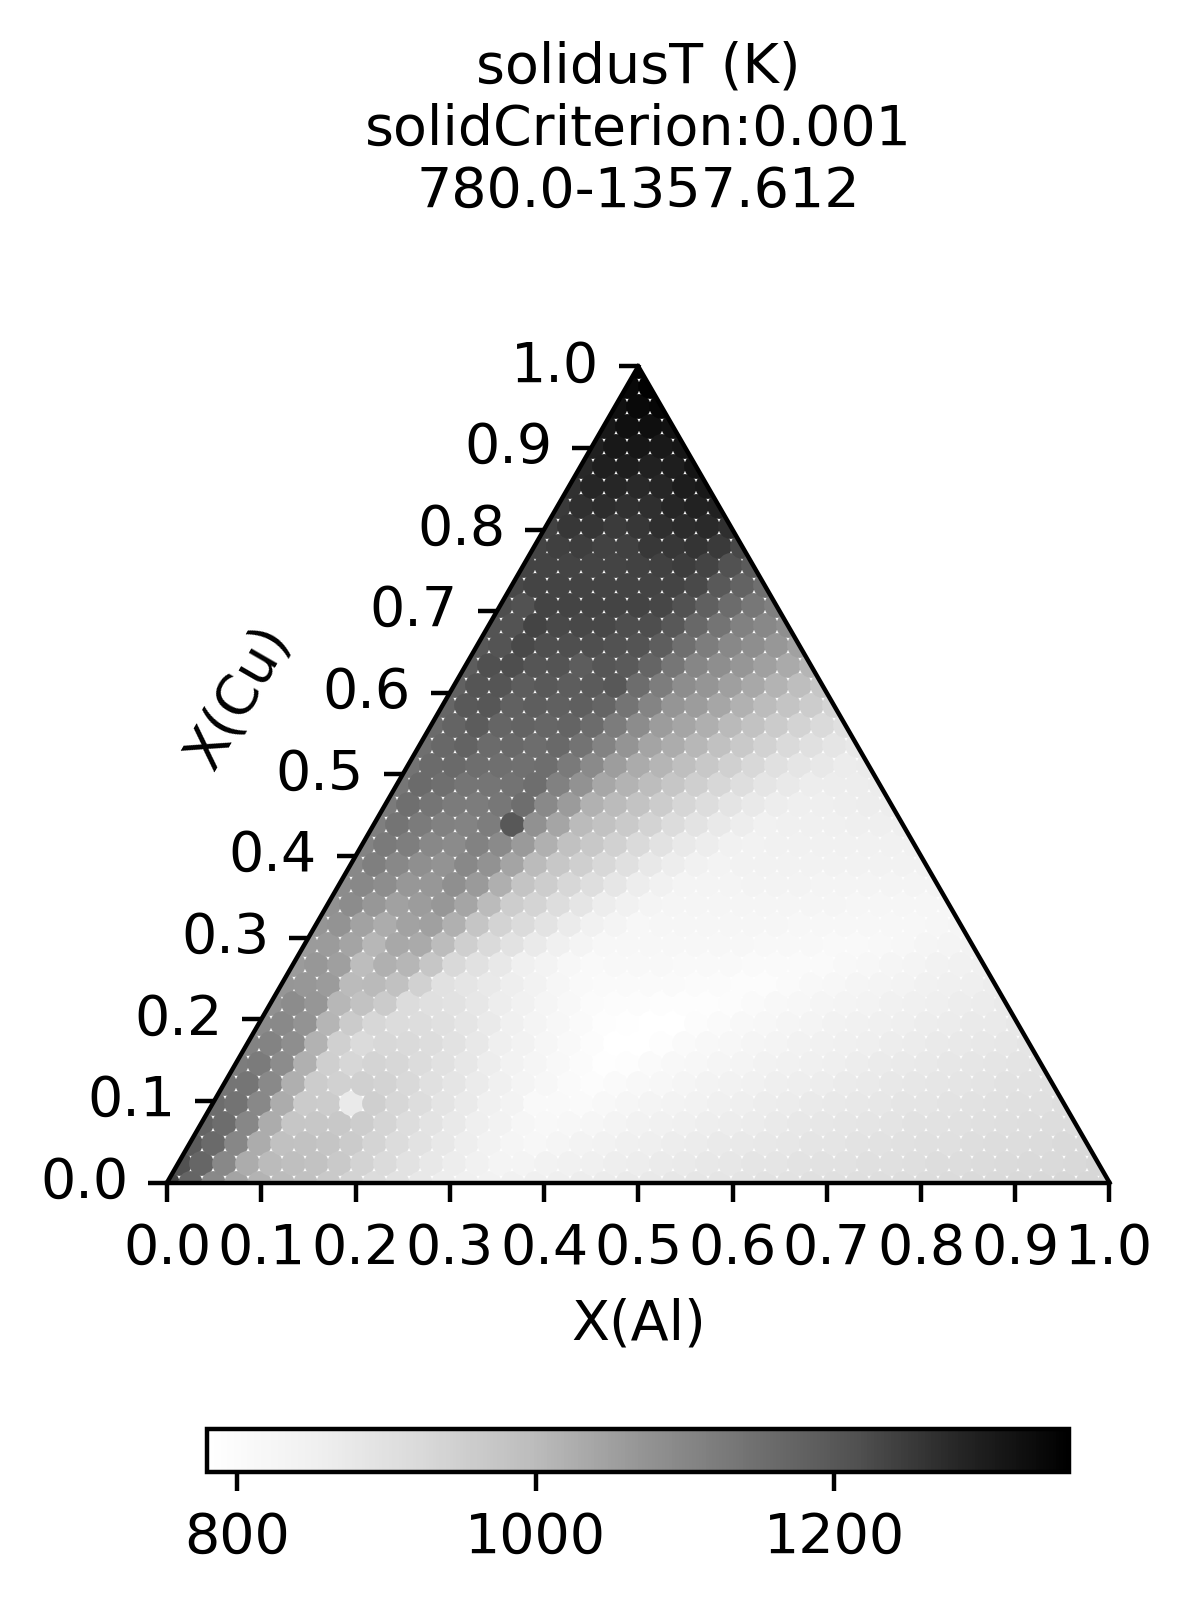

In [4]:
from materialsmap.plot.FeasibilityMap import plotMaps
plotMaps('./Simulation/09-07-2023-Ag-Al-Cu-database-Ag-Al-Cu','pycalphad')

In [5]:
print(path)

NameError: name 'path' is not defined